In [59]:
# Magic Commands
%matplotlib notebook
%matplotlib inline

In [60]:
#Import Dependencies
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics as stat

In [61]:
# Assign File Paths
ride_data_file_path = os.path.join('..','Resources','ride_data.csv')
city_data_file_path = os.path.join('..','Resources','city_data.csv')

# Extract Data
ride_data_df = pd.read_csv(ride_data_file_path)
city_data_df = pd.read_csv(city_data_file_path)

In [62]:
ride_data_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


In [63]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [64]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [65]:
ride_data_df.city.unique()

array(['Lake Jonathanshire', 'South Michelleport', 'Port Samanthamouth',
       'Rodneyfort', 'South Jack', 'South Latoya', 'New Paulville',
       'Simpsonburgh', 'South Karenland', 'North Jasmine',
       'New Kimberlyborough', 'West Angela', 'Roberthaven', 'North Jason',
       'Williamsview', 'Leahton', 'West Anthony', 'New Paulton',
       'West Patrickchester', 'Deanville', 'West Josephberg',
       'West Samuelburgh', 'West Heidi', 'Loganberg', 'Huntermouth',
       'Grahamburgh', 'Port Frank', 'East Kaylahaven', 'West Robert',
       'North Markport', 'Richardfort', 'Reynoldsfurt', 'Justinberg',
       'Martinezhaven', 'Jerryton', 'Lake Scottton', 'South Evanton',
       'Rogerston', 'West Ericstad', 'Hurleymouth', 'Joneschester',
       'Port Angela', 'Barajasview', 'West Christopherberg',
       'New Jacobville', 'Port David', 'Valentineton', 'Carriemouth',
       'Williamsstad', 'Royland', 'Karenberg', 'Christopherfurt',
       'Liumouth', 'Johnton', 'Erikaland', 'Raymondhav

In [66]:
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [67]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [68]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [69]:
city_data_df.type.unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [70]:
city_data_df.type.value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [71]:
pyber_df = city_data_df.merge(ride_data_df, how = 'outer', on = 'city')
pyber_df

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2019-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2019-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2019-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2019-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2019-04-17 02:26:37,23.00,720020655850
...,...,...,...,...,...,...
2370,Jessicaport,1,Rural,2019-01-31 17:57:25,58.29,623154556195
2371,South Saramouth,7,Rural,2019-02-20 16:32:36,44.29,3622365199969
2372,South Saramouth,7,Rural,2019-01-28 15:55:33,31.25,7118046558393
2373,South Saramouth,7,Rural,2019-03-27 21:07:16,11.87,170351888128


In [72]:
pyber_df.count()

city            2375
driver_count    2375
type            2375
date            2375
fare            2375
ride_id         2375
dtype: int64

# Average Fare vs Number of Rides/Drivers

In [146]:
# Aggregations
city_type = city_data_df.groupby(['city']).first()['type']
total_drivers = city_data_df.groupby(['city']).mean()['driver_count']
total_rides = pyber_df.groupby(pyber_df['city']).count()['ride_id']
avg_fare = pyber_df.groupby(pyber_df['city']).mean()['fare']

#Merge into DataFrame
pyber_city_df = pd.DataFrame({
    "Type" : city_type,
    "Drivers" : total_drivers,
    "Total Rides" : total_rides,
    "Average Fare" : avg_fare
})
pyber_city_df

,Type,Drivers,Total Rides,Average Fare
city,,,,
Amandaburgh,Urban,12,18,24.641667
Barajasview,Urban,26,22,25.332273
Barronchester,Suburban,11,16,36.422500
Bethanyland,Suburban,22,18,32.956111
Bradshawfurt,Rural,7,10,40.064000
...,...,...,...,...
West Robert,Urban,39,31,25.123871
West Samuelburgh,Urban,73,25,21.767600
Williamsonville,Suburban,2,14,31.875000


In [145]:
pyber_urban_df = pyber_city_df.loc[(pyber_city_df.Type == 'Urban')][['Drivers','Total Rides','Average Fare']]
pyber_suburban_df = pyber_city_df.loc[(pyber_city_df.Type == 'Suburban')][['Drivers','Total Rides','Average Fare']]
pyber_rural_df = pyber_city_df.loc[(pyber_city_df.Type == 'Rural')][['Drivers','Total Rides','Average Fare']]
pyber_rural_df

,Type,Drivers,Total Rides,Average Fare
city,,,,
Bradshawfurt,Rural,7,10,40.064000
Garzaport,Rural,7,3,24.123333
Harringtonfort,Rural,4,6,33.470000
Jessicaport,Rural,1,6,36.013333
Lake Jamie,Rural,4,6,34.358333
Lake Latoyabury,Rural,2,11,26.061818
Michaelberg,Rural,6,12,34.997500
New Ryantown,Rural,2,6,43.278333
Newtonview,Rural,1,4,36.745000


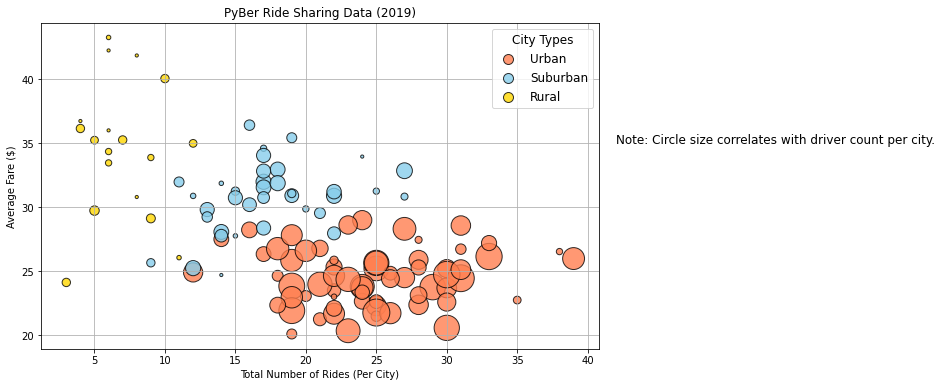

In [217]:
# Plot
plt.subplots(figsize=(10,6))
plt.scatter(
    pyber_urban_df['Total Rides'],
    pyber_urban_df['Average Fare'],
    s = 10*pyber_urban_df['Drivers'],
    c = 'coral',
    edgecolor = 'black',
    linewidths = 1,
    alpha = 0.8,
    label = 'Urban'
)
plt.scatter(
    pyber_suburban_df['Total Rides'],
    pyber_suburban_df['Average Fare'],
    s = 10*pyber_suburban_df['Drivers'],
    c = 'skyblue',
    edgecolor = 'black',
    alpha = 0.8,
    label = 'Suburban'
)
plt.scatter(
    pyber_rural_df['Total Rides'],
    pyber_rural_df['Average Fare'],
    s = 10*pyber_rural_df['Drivers'],
    c = 'gold',
    edgecolor = 'black',
    alpha = 0.8,
    label = 'Rural'
)
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('PyBer Ride Sharing Data (2019)')
plt.grid()

# Legend
lgnd = plt.legend(fontsize="12", mode="Expanded",scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [100]
lgnd.legendHandles[1]._sizes = [100]
lgnd.legendHandles[2]._sizes = [100]
lgnd.get_title().set_fontsize(12)

# Note
plt.text(42,35,'Note: Circle size correlates with driver count per city.',fontsize=12, wrap=True)
# plt.tight_layout()

# Save
fig1_path = os.path.join('..','Resources','Fig1.png')
plt.savefig(fig1_path)